In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
ROOTPATH = 'E:/AThesis/Final'
DATAPATH= ROOTPATH+'/training_set'
TRAINPATH = ROOTPATH+'/training_set'
TESTPATH =  ROOTPATH+'/testing_set'
MODELPATH = ROOTPATH+'/model'

In [7]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [8]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [9]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [10]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [12]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [13]:
validation_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [14]:
test_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [15]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


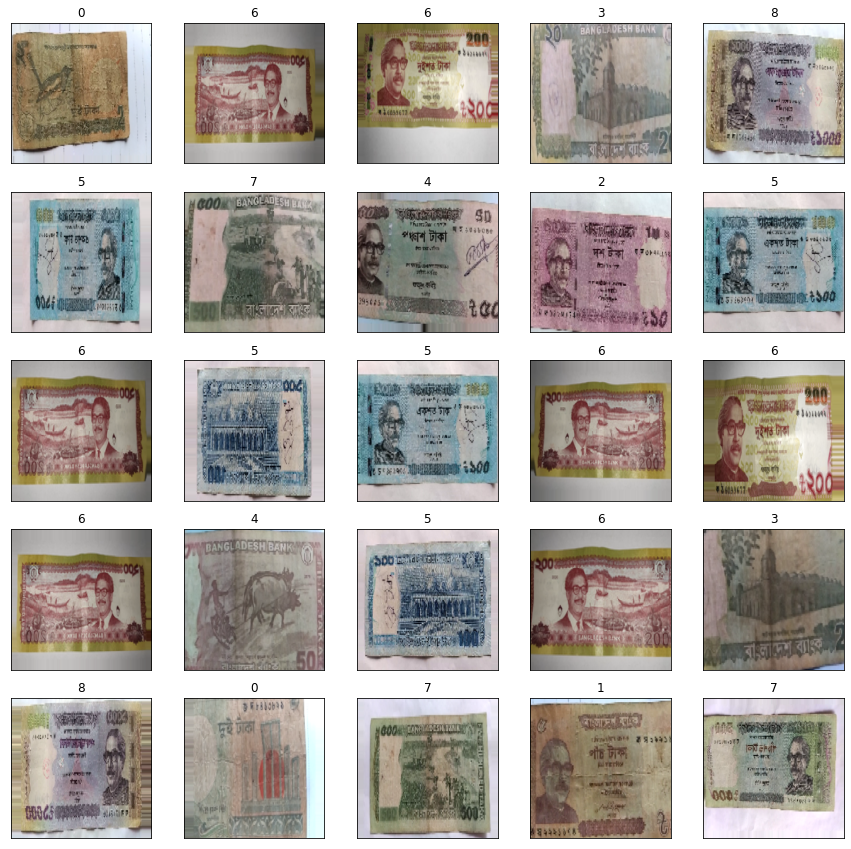

In [16]:
x,y=training_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

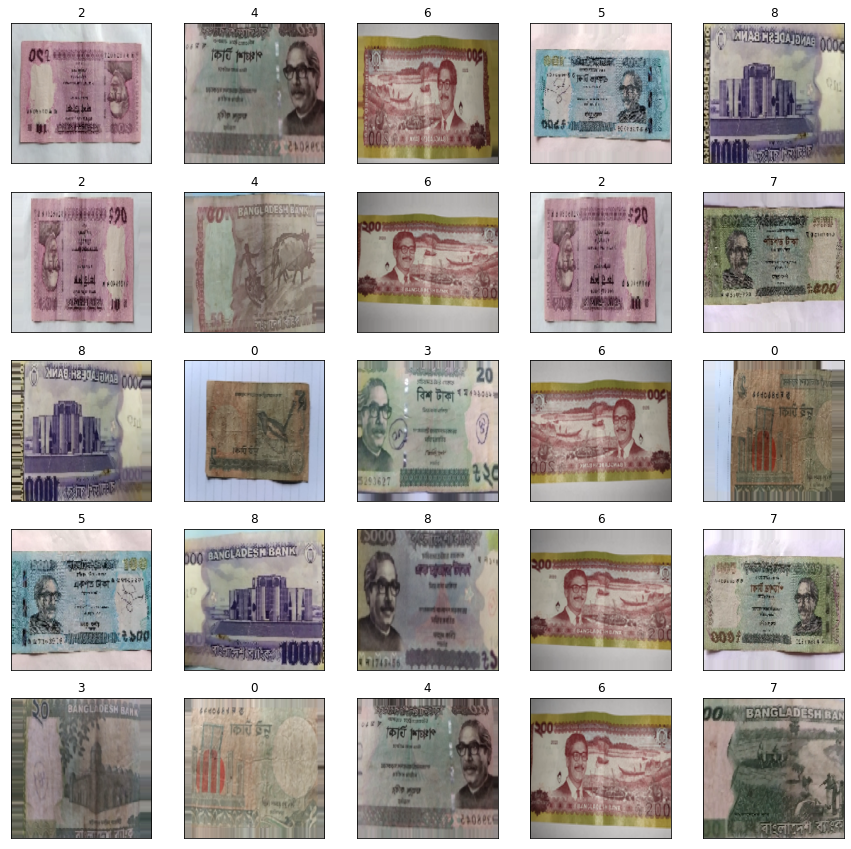

In [17]:
x,y=validation_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [28]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten 

In [29]:
mobile_model=tf.keras.applications.mobilenet.MobileNet()

In [30]:
mobile_model = Sequential()
pretrained_model=tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224,224,3), dropout=0.001,
    include_top=False, weights='imagenet', input_tensor=None, pooling='avg',
    classes=9
)
for layer in pretrained_model.layers:
        layer.trainable=False

mobile_model.add(pretrained_model)

In [31]:
mobile_model.add(Flatten())
mobile_model.add(Dense(512, activation='relu'))
mobile_model.add(Dense(9, activation='softmax'))

In [32]:
mobile_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
Total params: 3,758,281
Trainable params: 529,417
Non-trainable params: 3,228,864
_________________________________________________________________


In [33]:
mobile_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODELPATH+'MobileNet_Pretrained.model.best.hdf5', verbose=1 ,save_best_only=True)

In [35]:
history=mobile_model.fit(training_set,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 0.3065 - accuracy: 0.9185
Epoch 00001: val_loss improved from inf to 0.11461, saving model to E:/AThesis/Final\modelMobileNet_Pretrained.model.best.hdf5
68/68 [==============================] - 129s 2s/step - loss: 0.3065 - accuracy: 0.9185 - val_loss: 0.1146 - val_accuracy: 0.9620
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000
Epoch 00002: val_loss improved from 0.11461 to 0.05390, saving model to E:/AThesis/Final\modelMobileNet_Pretrained.model.best.hdf5
68/68 [==============================] - 129s 2s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9870
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 00003: val_loss did not improve from 0.05390
68/68 [==============================] - 129s 2s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9852
Epoch 4/50
68/68 [=

Epoch 27/50
68/68 [==============================] - ETA: 0s - loss: 6.9650e-05 - accuracy: 1.0000
Epoch 00027: val_loss did not improve from 0.01237
68/68 [==============================] - 129s 2s/step - loss: 6.9650e-05 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9972
Epoch 28/50
68/68 [==============================] - ETA: 0s - loss: 5.5245e-05 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.01237
68/68 [==============================] - 128s 2s/step - loss: 5.5245e-05 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9935
Epoch 29/50
68/68 [==============================] - ETA: 0s - loss: 5.3155e-05 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 0.01237
68/68 [==============================] - 128s 2s/step - loss: 5.3155e-05 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9972
Epoch 30/50
68/68 [==============================] - ETA: 0s - loss: 4.7430e-05 - accuracy: 1.0000
Epoch 00030: val_loss improved from 0.01237 to 0.

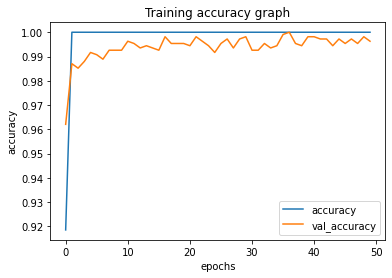

In [36]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

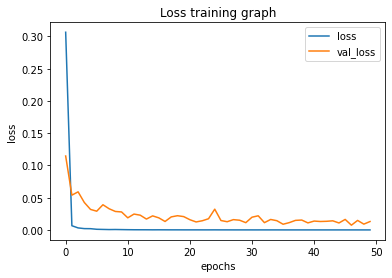

In [37]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [39]:
test_loss,test_accuracy=mobile_model.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

9/9 [==============================] - 22s 2s/step - loss: 0.2181 - accuracy: 0.9409
Test Loss:  0.21806980669498444
Test Accuracy:  0.9408695697784424


In [40]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  94.08695697784424


In [41]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[4.7367097e-09 9.9999988e-01 1.2443190e-10 3.1579436e-08 6.3658149e-08
  2.6729042e-15 9.5885029e-11 1.6153840e-14 5.3606728e-13]]
1


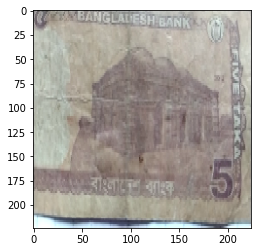

In [43]:
random_image=image.load_img('E:/AThesis/Final/testing_set/2.five/five14.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobile_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.4520059e-07 7.5006128e-08 9.9999893e-01 1.9774367e-08 2.8954913e-08
  4.9431064e-09 5.9456431e-07 1.5595980e-08 2.2290443e-07]]
2


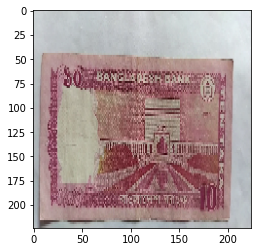

In [44]:
random_image=image.load_img('E:/AThesis/Final/testing_set/3.ten/ten46.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobile_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.7716445e-09 3.5287517e-06 2.4919833e-10 1.9060948e-06 9.9997711e-01
  1.3694137e-11 7.7677936e-07 6.0785474e-11 1.6608750e-05]]
4


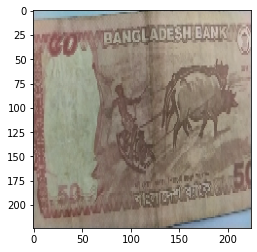

In [45]:
random_image=image.load_img('E:/AThesis/Final/testing_set/5.fifty/fifty34.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobile_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.1341239e-06 1.0003492e-06 8.6600842e-09 9.9999750e-01 1.1172485e-09
  6.9237790e-13 1.1434931e-08 3.9167816e-07 1.5779729e-09]]
3


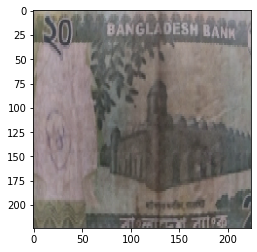

In [46]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty38.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobile_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[4.0575238e-11 1.1197789e-08 7.0555979e-09 9.9999523e-01 4.1989770e-06
  1.5170886e-07 4.8991137e-07 2.5918978e-10 3.2748947e-08]]
3


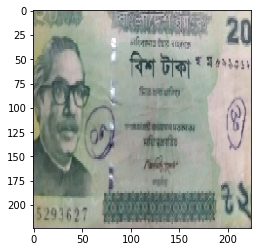

In [47]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobile_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.9802339e-01 3.1872210e-04 1.2194968e-05 2.7005773e-04 4.9128568e-05
  6.2764650e-07 4.3155555e-06 1.3215188e-03 5.8127217e-08]]
0


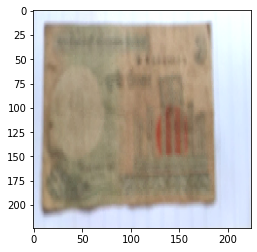

In [48]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two44.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobile_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [49]:
predicted_result=mobile_model.predict(test_set)
predicted_result[:5]

array([[9.99995351e-01, 1.02973900e-06, 1.28488466e-07, 2.21852497e-06,
        1.13253691e-06, 1.46373347e-11, 1.93699323e-09, 2.80959362e-08,
        1.32556483e-11],
       [9.99998689e-01, 7.09857844e-08, 1.95877234e-08, 1.11610564e-06,
        9.61025819e-08, 3.56796623e-12, 8.33015323e-10, 8.05236589e-09,
        4.62591250e-12],
       [9.99996781e-01, 2.11079666e-07, 2.82132060e-08, 2.77891854e-06,
        2.10140669e-07, 7.84562346e-12, 2.24764052e-09, 1.75978823e-08,
        3.14313436e-11],
       [9.99996066e-01, 1.43878111e-07, 2.45119480e-08, 3.53987753e-06,
        2.96146737e-07, 1.04752335e-11, 1.71273040e-09, 1.73655685e-08,
        3.12441184e-11],
       [9.99995232e-01, 2.87298099e-06, 9.94942368e-08, 1.48259073e-06,
        3.57693693e-07, 1.88121449e-10, 3.87829058e-09, 5.44684298e-09,
        3.01565137e-08]], dtype=float32)

In [50]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [51]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0]
 [ 0  1  0 24  8 38  0  0  1]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 72]]


<AxesSubplot:>

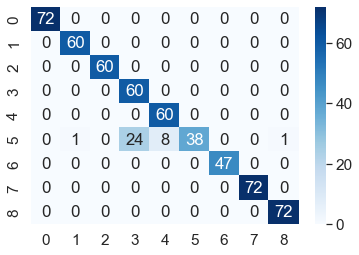

In [53]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [54]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9408695652173913


In [55]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       0.98      1.00      0.99        60
           2       1.00      1.00      1.00        60
           3       0.71      1.00      0.83        60
           4       0.88      1.00      0.94        60
           5       1.00      0.53      0.69        72
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        72
           8       0.99      1.00      0.99        72

    accuracy                           0.94       575
   macro avg       0.95      0.95      0.94       575
weighted avg       0.95      0.94      0.94       575



In [57]:
import time
t = time.time()

export_path_keras = "Final Thesis/Saved Model/Model_3_mobileNet_Pretrained{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
mobile_model.save(export_path_keras)

Final Thesis/Saved Model/Model_3_mobileNet_Pretrained0.9408695697784424_model_1647582155.h5


In [58]:
from tensorflow.keras.models import load_model

In [59]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
Total params: 3,758,281
Trainable params: 529,417
Non-trainable params: 3,228,864
_________________________________________________________________


In [60]:
print(len(reload_model.weights))
print(reload_model.output_shape)

139
(None, 9)


In [61]:
reload_model.layers

In [63]:
t = time.time()

export_path_sm = "Final Thesis/Saved Model/Model_3_mobileNet_Pretrained {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(mobile_model, export_path_sm)

Final Thesis/Saved Model/Model_3_mobileNet_Pretrained 0.9408695697784424 Model 1647582265
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Final Thesis/Saved Model/Model_3_mobileNet_Pretrained 0.9408695697784424 Model 1647582265\assets


In [64]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [65]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(mobilenet_1.00_224_input) at 0x2AF466C00F0>

In [66]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x2af62956908>

In [68]:
model=reload_model

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import pyttsx3 
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
export_path_keras = "Final Thesis/Saved Model/4.Model_MobileNet_Pretrained.h5"

In [4]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
Total params: 3,758,281
Trainable params: 529,417
Non-trainable params: 3,228,864
_________________________________________________________________


In [5]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
       # txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

Twenty Taka


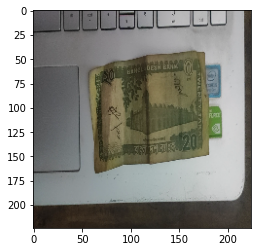

In [6]:
#""E:\AThesis\anotation\anotated img\5\new687.png"""
random_image=image.load_img('E:/AThesis/anotation/anotated img/5/new1709.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))